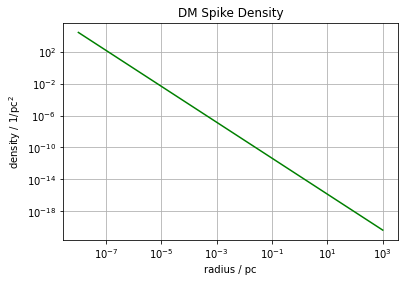

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import imripy
from imripy import merger_system as ms
from scipy.interpolate import interp1d



π = np.pi
G = 4.4959e-15            #in units of M☉^-1 pc^3 yr^-2
c = 0.3068                #in units of pc yr^-1
ρ_eq = 3.1812e3           #in units of M☉ pc^-3 with ρ_eq=2.15368e-16 kg m^-3
t_m = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr
yr = 3.154e7              # in units of seconds
t_eq = 1.59246e12/yr      # in units of seconds





# Definition of the binary system 
m1 =  1 * ms.solar_mass_to_pc   # The central mass m1 with a mass of 1 solar masses, converted to pc

m2 = 1e-3 * ms.solar_mass_to_pc   # The secondary mass of 1e-3 solar mass converted to pc

D_luminosity = 5e8              # The distance to the system from earth as 500 Mpc


ρ_bar = (ρ_eq/2)*(t_eq**(3/2))*((2*G* (m1/ms.solar_mass_to_pc))**(3/4))



# Dark matter spike with alpha=9/4 for Primordial black holes case
r_spike = 1  # in parsecs, Choosen by choice

alpha = 9/4

rho_spike =  ρ_bar * (r_spike**(-9/4)) * ms.solar_mass_to_pc  # This takes the value of M_sun/pc^3 and converts it to 1/pc^2

spike = imripy.halo.Spike(rho_spike, r_spike, alpha)




# Plot density
r_grid = np.geomspace(1e-8, 1e3, 100)  # creates a grid in pc
plt.loglog(r_grid, spike.density(r_grid), 'g')
plt.grid()
plt.xlabel("radius / pc")
plt.ylabel("density / 1/pc$^2$")
plt.title('DM Spike Density')
plt.savefig('spike density.pdf')
plt.show()

In [22]:
sp = ms.SystemProp(m1, m2, spike, D_luminosity)   # Create the SystemProp object describing the IMRI system

# Setting initial and final conditions of the binary evolution for an eccentric orbit

a0 = 100. * sp.r_isco()              # Choosen as 100*r_isco by choice

a_fin = sp.r_isco()      # Choosen equal to r_icso

R_fin = sp.r_isco()      # The final condition for the evolution



# Solving the differential equation of the binary evolution
ev_ecc_0 = imripy.inspiral.Classic.Evolve(sp, a0, e_0=0.89,  a_fin = R_fin)
ev_ecc_1 = imripy.inspiral.Classic.Evolve(sp, a0, e_0=0.90,  a_fin = R_fin)
ev_ecc_2 = imripy.inspiral.Classic.Evolve(sp, a0, e_0=0.92,  a_fin = R_fin)
ev_ecc_3 = imripy.inspiral.Classic.Evolve(sp, a0, e_0=0.95,  a_fin = R_fin)
ev_ecc_4 = imripy.inspiral.Classic.Evolve(sp, a0, e_0=0.99,  a_fin = R_fin)

Evolving from  100.0  to  1.0 r_isco  with initial eccentricity 0.89  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
A termination event occurred.
 -> Evolution took 1.0476s
Evolving from  100.0  to  1.0 r_isco  with initial eccentricity 0.9  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
A termination event occurred.
 -> Evolution took 1.0335s
Evolving from  100.0  to  1.0 r_isco  with initial eccentricity 0.92  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
A termination event occurred.
 -> Evolution took 1.0947s
Evolving from  100.0  to  1.0 r_isco  with initial eccentricity 0.95  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
A termination event occurred.
 -> Evolution took 1.1183s
Evolving from  100.0  to  1.0 r_isco  with initial eccentricity 0.99  with  Options: accretion = False, haloPhaseSpaceDescription = False, ac

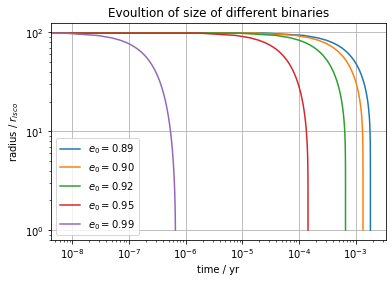

In [25]:
plt.loglog(ev_ecc_0.t/ms.year_to_pc,  ev_ecc_0.a/sp.r_isco())
plt.loglog(ev_ecc_1.t/ms.year_to_pc,  ev_ecc_1.a/sp.r_isco())
plt.loglog(ev_ecc_2.t/ms.year_to_pc,  ev_ecc_2.a/sp.r_isco())
plt.loglog(ev_ecc_3.t/ms.year_to_pc,  ev_ecc_3.a/sp.r_isco())
plt.loglog(ev_ecc_4.t/ms.year_to_pc,  ev_ecc_4.a/sp.r_isco())
plt.legend(["$e_{0}=0.89$","$e_{0}=0.90$","$e_{0}=0.92$","$e_{0}=0.95$","$e_{0}=0.99$"])
plt.xlabel("time / yr")
plt.ylabel("radius / $r_{isco}$")
plt.grid()
plt.title('Evoultion of size of different binaries')
plt.savefig('size of binaries.pdf')
plt.show()

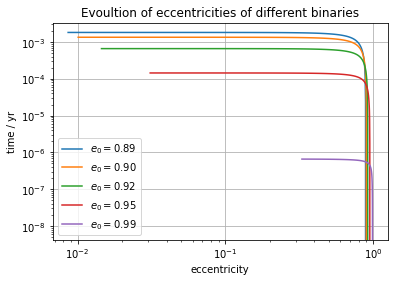

In [29]:
plt.loglog(ev_ecc_0.e, ev_ecc_0.t/ms.year_to_pc)
plt.loglog(ev_ecc_1.e, ev_ecc_1.t/ms.year_to_pc)
plt.loglog(ev_ecc_2.e, ev_ecc_2.t/ms.year_to_pc)
plt.loglog(ev_ecc_3.e, ev_ecc_3.t/ms.year_to_pc)
plt.loglog(ev_ecc_4.e, ev_ecc_4.t/ms.year_to_pc)
plt.legend(["$e_{0}=0.89$","$e_{0}=0.90$","$e_{0}=0.92$","$e_{0}=0.95$","$e_{0}=0.99$"])
plt.ylabel("time / yr")
plt.xlabel("eccentricity")
plt.grid()
plt.title('Evoultion of eccentricities of different binaries')
plt.savefig('Eccentricities of binaries.pdf')
plt.show()

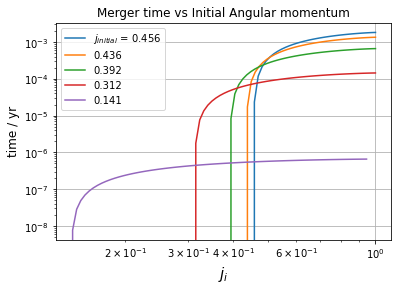

In [53]:
e0_list = [0.89,0.90,0.92,0.95,0.99]


def j_i(e0):
    return np.sqrt(1 - (e0**2))


j_i_list=np.zeros(len(e0_list))
for i, e0 in enumerate(e0_list):
    j_i_list[i] = j_i(e0)
    


j_i_0 = np.sqrt(1 - (ev_ecc_0.e**2))
j_i_1 = np.sqrt(1 - (ev_ecc_1.e**2))
j_i_2 = np.sqrt(1 - (ev_ecc_2.e**2))
j_i_3 = np.sqrt(1 - (ev_ecc_3.e**2))
j_i_4 = np.sqrt(1 - (ev_ecc_4.e**2))

plt.loglog(j_i_0, ev_ecc_0.t/ms.year_to_pc)
plt.loglog(j_i_1, ev_ecc_1.t/ms.year_to_pc)
plt.loglog(j_i_2, ev_ecc_2.t/ms.year_to_pc)
plt.loglog(j_i_3, ev_ecc_3.t/ms.year_to_pc)
plt.loglog(j_i_4, ev_ecc_4.t/ms.year_to_pc)

plt.legend(["$j_{initial}$ = 0.456",'%0.3f'%j_i_list[1],'%0.3f'%j_i_list[2],'%0.3f'%j_i_list[3],
            '%0.3f'%j_i_list[4]])
plt.ylabel("time / yr", fontsize=12)
plt.xlabel("$j_{i}$",fontsize=15)
plt.grid()
plt.title('Merger time vs Initial Angular momentum')
plt.savefig('t_m vs j_i.pdf')
plt.show()